In [1]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
uniform_horizon_dir = "../outputs/lift_lowdim_ph_reproduction/2025.04.12_11.32.56_train_diffusion_unet_lowdim_lift_lowdim_16_state_estimator/uniform_horizon_jumping_disturbance"

In [4]:
success_rate_lst = list()
for horizon in range(1, 15):
    py_data = json.load(open(os.path.join(uniform_horizon_dir, f"eval_jumping_disturbance_horizon_{horizon}_num_distrub_1_pos_0.05_gripper_dir_near_gripper_0.025_200episodes", "eval_log.json")))
    success_rate_lst.append(py_data["test/mean_score"])
success_rate_lst = np.array(success_rate_lst)

In [7]:
len(success_rate_lst)

12

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


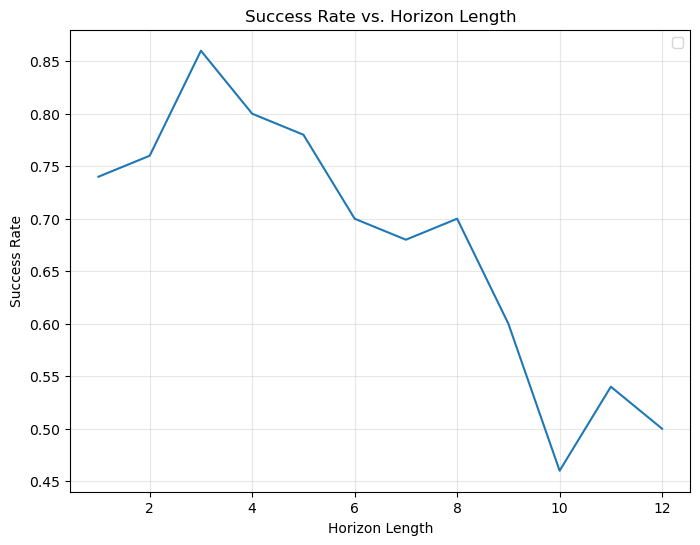

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.plot(np.arange(1, 13), success_rate_lst)
ax1.set_xlabel('Horizon Length')
ax1.set_ylabel('Success Rate')
ax1.set_title('Success Rate vs. Horizon Length')
ax1.legend()
ax1.grid(True, alpha=0.3)
plt.show()